In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [11]:

df = pd.read_csv('/content/lab 4-5.csv')

In [12]:

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [13]:

df.describe()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [14]:

df_Trip_Distance = df['Trip_Distance_km']
df_Trip_Distance

,Trip_Distance_km
0,19.35
1,47.59
2,36.87
3,30.33
4,NaN
...,...
995,5.49
996,45.95
997,7.70
998,47.56


In [15]:

df_Trip_Distance.isnull()


,Trip_Distance_km
0,False
1,False
2,False
3,False
4,True
...,...
995,False
996,False
997,False
998,False


In [16]:

df_Trip_Distance.shape

(1000,)

In [17]:


df_Trip_Distance.quantile(0.20)

9.687999999999999

In [18]:

df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True)

In [19]:


df['Trip_Distance_km']


,Trip_Distance_km
0,19.35
1,47.59
2,36.87
3,30.33
4,25.83
...,...
995,5.49
996,45.95
997,7.70
998,47.56


<Axes: ylabel='Trip_Distance_km'>

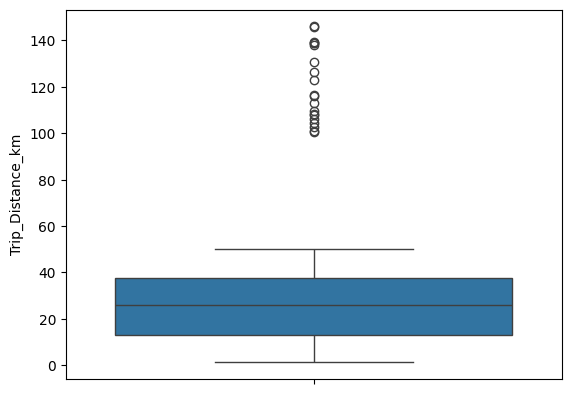

In [20]:


sns.boxplot(y=df['Trip_Distance_km'])

In [21]:

# Calculate Q1, Q3, and IQR for Trip_distance_km
Q1 = df['Trip_Distance_km'].quantile(0.25)
Q3 = df['Trip_Distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median = df['Trip_Distance_km'].median()
df['Trip_Distance_km'] = df['Trip_Distance_km'].apply(
    lambda x: median if x < lower_bound or x > upper_bound else x
)


<Axes: ylabel='Trip_Distance_km'>

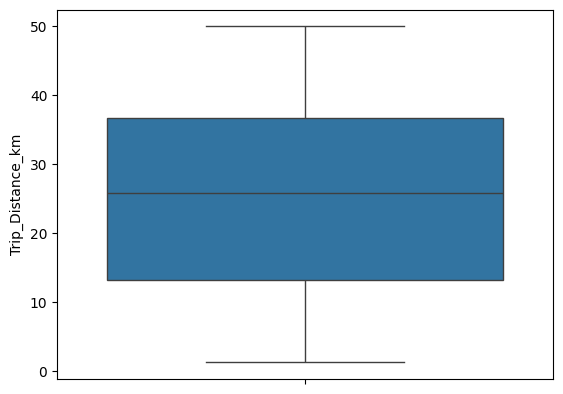

In [22]:

sns.boxplot(y=df['Trip_Distance_km'])


In [23]:

df['Trip_Price'].isnull()

,Trip_Price
0,False
1,True
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [24]:

df['Trip_Price'].count()

951

In [25]:


df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)

In [26]:

df['Trip_Price']

,Trip_Price
0,36.2624
1,50.0745
2,52.9032
3,36.4698
4,15.6180
...,...
995,34.4049
996,62.1295
997,33.1236
998,61.2090


<Axes: ylabel='Trip_Price'>

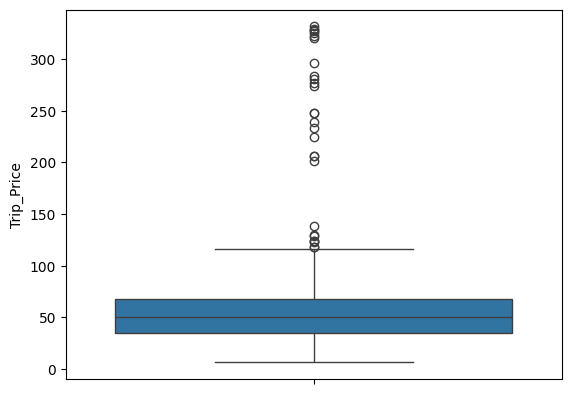

In [27]:

sns.boxplot(y=df['Trip_Price'])

In [28]:
# Calculate the median for Trip_price
median_price = df['Trip_Price'].median()

# Calculate Q1, Q3, and IQR for Trip_price
Q1_price = df['Trip_Price'].quantile(0.25)
Q3_price = df['Trip_Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate lower and upper bounds for outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Replace outliers in Trip_price with the median
df['Trip_Price'] = df['Trip_Price'].apply(
    lambda x: median_price if x < lower_bound_price or x > upper_bound_price else x
)


<Axes: ylabel='Trip_Price'>

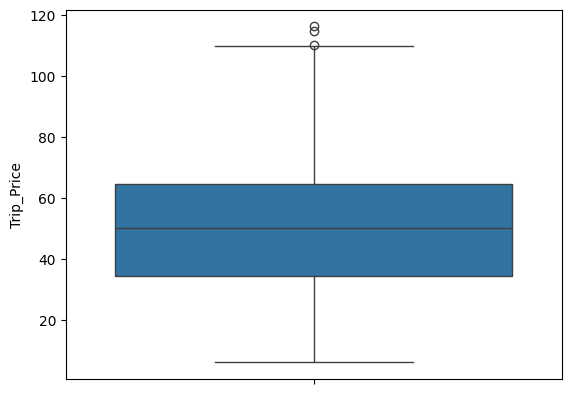

In [29]:

sns.boxplot(y=df['Trip_Price'])

In [31]:

X = df[['Trip_Distance_km']]
y = df['Trip_Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

mse

np.sqrt(mse)

16.86738108844994

Text(0.5, 0, 'Actual Trip Price')

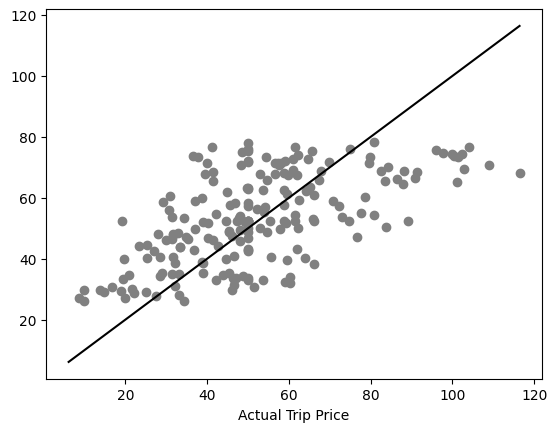

In [32]:

plt.scatter(y_test, y_pred, color= 'grey', label = 'Predicted Data')
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='black', label='Ideal Prediction Line')
plt.xlabel('Actual Trip Price')

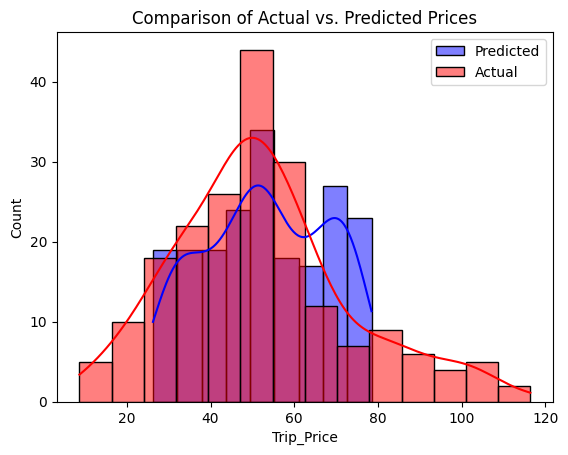

In [33]:
sns.histplot(y_pred, color='blue', kde=True, label='Predicted')
sns.histplot(y_test, color='red', kde=True, label='Actual')
plt.legend()
plt.title('Comparison of Actual vs. Predicted Prices')
plt.show()